Slide assets exported.


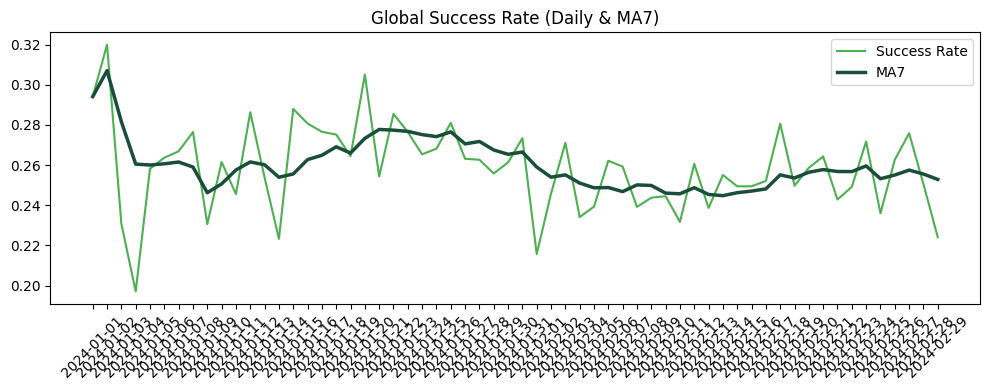

In [1]:
# Notebook 4 — Exports for Slides
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('..')
from src.funnel_utils import WISE_COLORS

daily = pd.read_csv("../data/daily_segmented.csv")
global_d = pd.read_csv("../data/daily_global.csv")

# Global success rate plot
plt.figure(figsize=(10,4))
plt.plot(global_d["created_date"], global_d["success_rate"], label="Success Rate", linewidth=1.5, color=WISE_COLORS[2])
plt.plot(global_d["created_date"], global_d["success_rate_ma7"], label="MA7", linewidth=2.5, color=WISE_COLORS[0])
plt.legend(); plt.title("Global Success Rate (Daily & MA7)"); plt.xticks(rotation=45); plt.tight_layout()
plt.savefig("../exports/global_success_rate.png", dpi=200)

# 100% stacked bar by segment (example: region)
# Prepare a recent window
recent = daily.copy()
# compute shares
grp = recent.groupby(["created_date","region"], dropna=False).agg(
    created=("created","sum"),
    transferred=("transferred","sum")
).reset_index()
grp["not_transferred"] = grp["created"] - grp["transferred"]
# export a recent day table
recent_day = grp["created_date"].max()
out_tab = grp[grp["created_date"] == recent_day].copy()
out_tab.to_csv("../data/exports/region_share_latest.csv", index=False)

print("Slide assets exported.")